In [1]:
import matplotlib.pyplot as plt

In [2]:
import os

In [11]:
#get image dataset
os.listdir("./Covid19-dataset/train/Covid")

['01.jpeg',
 '010.png',
 '012.jpeg',
 '015.jpg',
 '019.png',
 '02.jpeg',
 '020.jpg',
 '021.jpeg',
 '022.jpeg',
 '024.jpeg',
 '025.jpeg',
 '026.jpeg',
 '027.jpeg',
 '03.jpeg',
 '031.jpeg',
 '032.jpeg',
 '033.png',
 '039.jpeg',
 '04.png',
 '040.jpeg',
 '041.jpeg',
 '042.jpeg',
 '043.jpeg',
 '044.jpeg',
 '045.jpeg',
 '046.jpeg',
 '047.jpeg',
 '048.jpeg',
 '049.jpeg',
 '050.jpeg',
 '051.jpeg',
 '052.jpeg',
 '053.jpeg',
 '054.jpeg',
 '055.jpeg',
 '056.jpg',
 '057.jpeg',
 '058.jpeg',
 '059.jpeg',
 '06.jpeg',
 '060.jpeg',
 '061.jpg',
 '062.jpeg',
 '064.jpg',
 '065.jpeg',
 '067.jpg',
 '068.jpg',
 '069.jpg',
 '07.jpg',
 '071.jpg',
 '072.jpeg',
 '073.jpg',
 '074.jpg',
 '076.jpg',
 '078.jpeg',
 '079.jpeg',
 '08.jpeg',
 '080.jpg',
 '081.jpeg',
 '082.jpg',
 '083.jpeg',
 '084.jpeg',
 '085.jpeg',
 '086.jpg',
 '088.jpeg',
 '089.jpg',
 '09.png',
 '090.jpeg',
 '091.jpg',
 '092.png',
 'COVID-00001.jpg',
 'COVID-00002.jpg',
 'COVID-00003a.jpg',
 'COVID-00003b.jpg',
 'COVID-00004.jpg',
 'COVID-00005.jpg',


In [ ]:
! chmod +

In [24]:
image=plt.imread("./Covid19-dataset/train/Covid/02.jpeg")

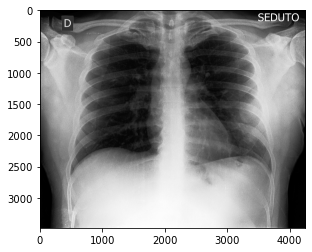

In [25]:
#visualize all three different xrays
plt.imshow(image)

In [22]:
image=plt.imread("./Covid19-dataset/train/Normal/01.jpeg")

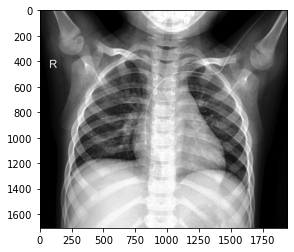

In [23]:
plt.imshow(image)

In [26]:
image=plt.imread("./Covid19-dataset/train/Viral Pneumonia/01.jpeg")

(1333, 1582, 3)

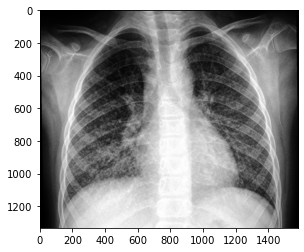

In [42]:
plt.imshow(image)
image.shape

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import ResNet50



In [35]:
#create 3 classes for each category
classes=[]
for file in os.listdir("./Covid19-dataset/train"):
    classes.append(file)


In [36]:
classes

['Covid', 'Normal', 'Viral Pneumonia']

In [37]:
image_data_generator=ImageDataGenerator(rescale=1./255, horizontal_flip=True,rotation_range=18.5, shear_range=0.1, fill_mode="nearest",validation_split=0.2)

In [46]:
train_data=image_data_generator.flow_from_directory(directory="./Covid19-dataset/train",target_size=(255,255),color_mode="rgb", classes=classes, class_mode="categorical",batch_size=64,subset="training")

Found 201 images belonging to 3 classes.


In [47]:
val_data=image_data_generator.flow_from_directory(directory="./Covid19-dataset/train",target_size=(255,255),color_mode="rgb", classes=classes, class_mode="categorical",batch_size=64,subset="validation")

Found 50 images belonging to 3 classes.


In [49]:
#test on preexisting model
model=ResNet50(input_shape=(255,255,3), include_top=False, classes=3)

94781440/94765736 [==============================] - 4s 0us/step


In [50]:
model.trainable=False

In [53]:
len(model.layers)

175

In [58]:
model= keras.Sequential([model, layers.Flatten(), layers.Dense(3, activation="softmax")])